## Clasificación binaria "Buggy" o "Not Buggy"

In [61]:
# Import de librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import xgboost as xgb

In [62]:
# Importado de los datos al dataframe 
df = pd.read_excel('./datasets/dataset.xlsx', sheet_name='method')
df.head()

,Project,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,...,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs,Buggy
0,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.ClientTimeoutTest.testTim...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
1,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
4,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.spi.impl.ClusterListenerT...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108106 entries, 0 to 108105
Data columns (total 77 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Project                            108106 non-null  object
 1   Hash                               108106 non-null  object
 2   LongName                           108106 non-null  object
 3   CC                                 108106 non-null  int64 
 4   CCL                                108106 non-null  int64 
 5   CCO                                108106 non-null  int64 
 6   CI                                 108106 non-null  int64 
 7   CLC                                108106 non-null  int64 
 8   CLLC                               108106 non-null  int64 
 9   LDC                                108106 non-null  int64 
 10  LLDC                               108106 non-null  int64 
 11  HCPL                               108106 non-null  

In [64]:
# Comprobación de datos Null 
print('Valores Null: ',df.isnull().sum().sum())

Valores Null:  0


In [65]:
# df.describe()

In [66]:
# df['Buggy'].value_counts

In [67]:
# Comprobación de filas duplicadas 
print('Filas duplicadas: ', df.duplicated().sum())

Filas duplicadas:  105


In [68]:
# Eliminación de las filas duplicadas
df = df.drop_duplicates()
# Comprobación de la eliminaciñon correcta de las filas duplicadas eliminadas
print( 'duplicated Values: ', df.duplicated().sum())

duplicated Values:  0


In [69]:
# Eliminación de columnas no apropiadas para el entrenamiento de los modelos
df = df.drop(['Project', 'Hash', 'LongName','Number of Bugs'], axis=1)
# Comprobación de los cambios realizados
df.head()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Buggy
0,0,0,0,0,0,0,0,0,148093,163636,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,212183,248,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,299316,36,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,349426,4386,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,0,0,0,0,513541,536364,...,0,0,0,0,0,0,1,0,0,1


In [70]:
# df.isnull().sum().sum()

In [71]:
# Visualización de la cantidad de datos tras el tratado de los datos
df.shape

(108001, 73)

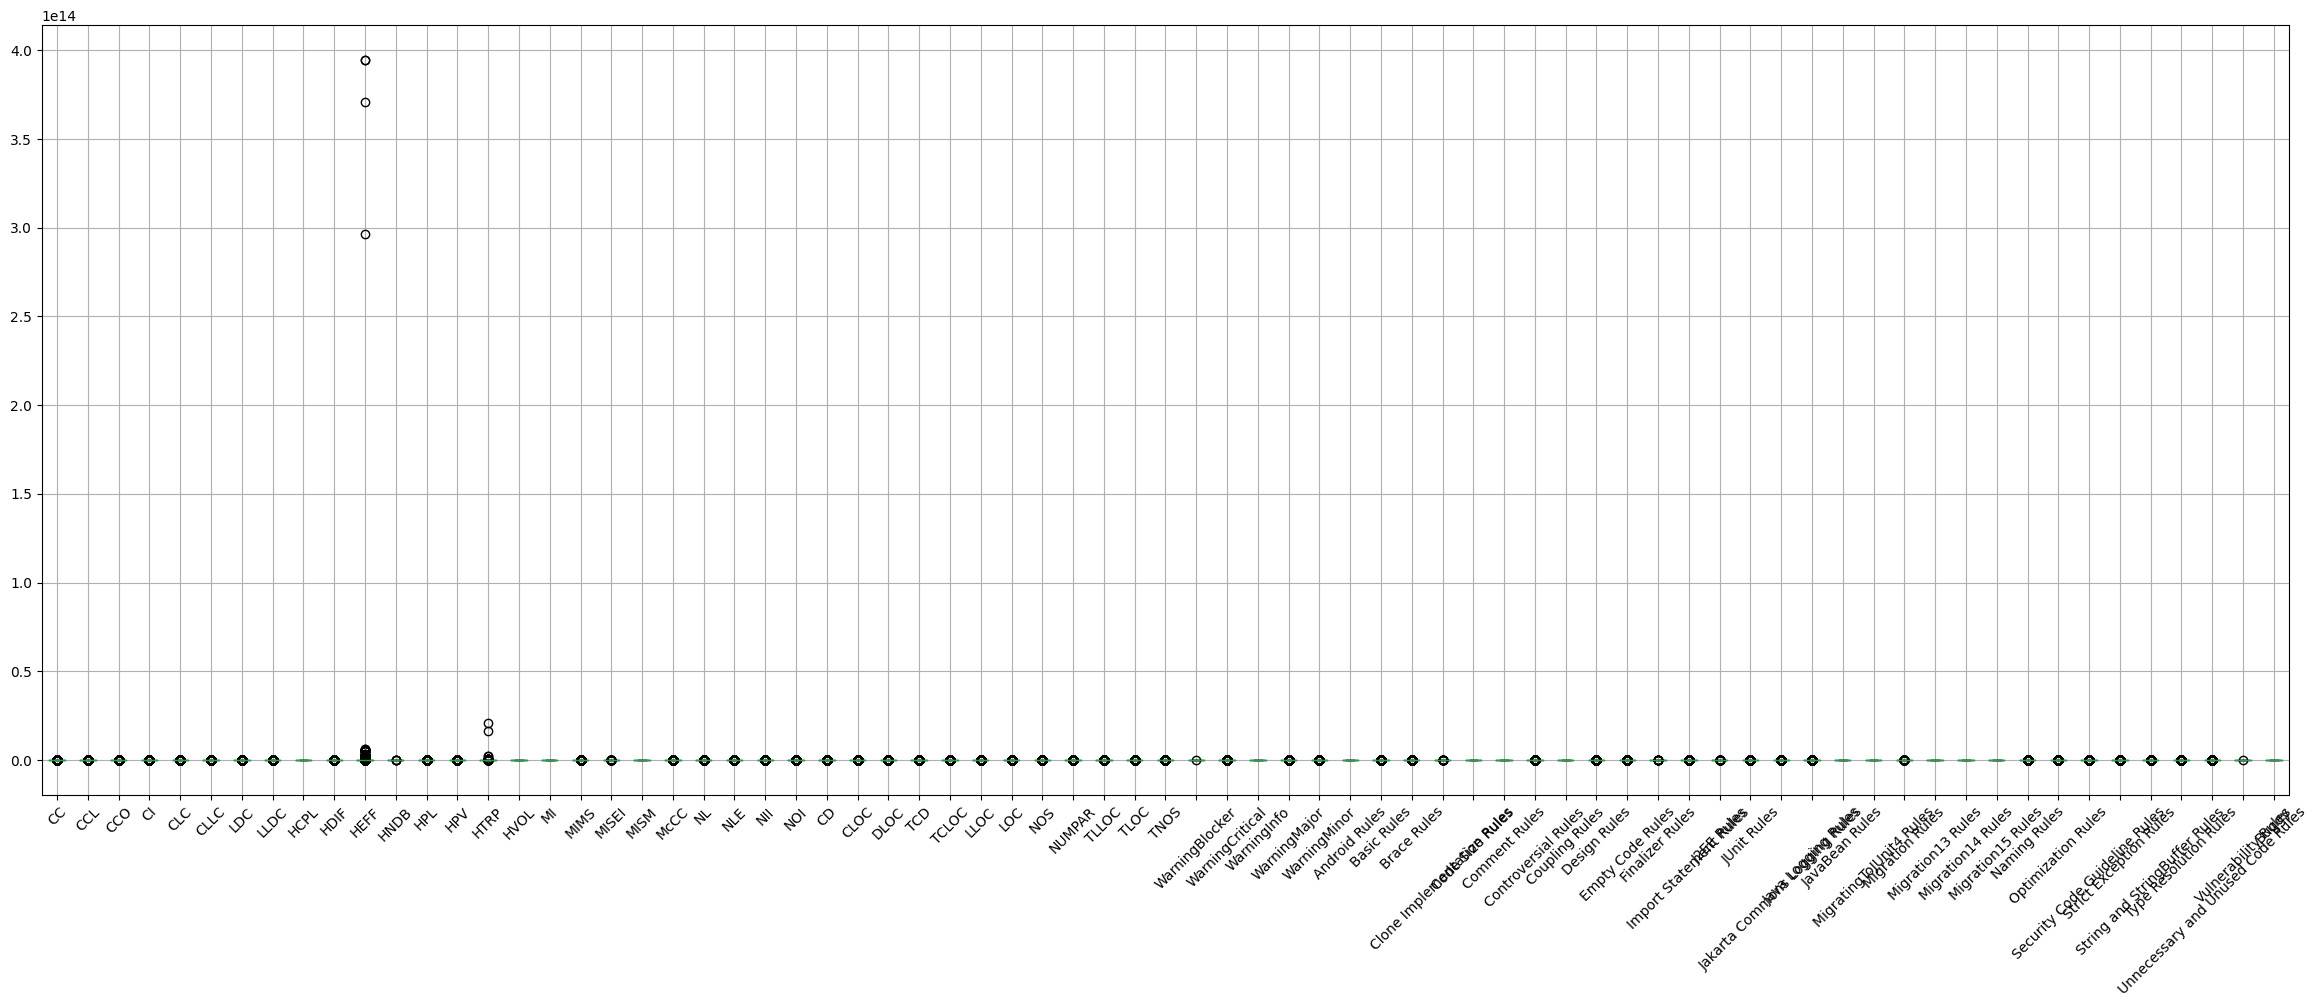

In [72]:
# Muestra de los valores atípicos para las features seleccionadas
plt.figure(figsize=(29,10))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [73]:
# Separación de los valores de entrada para el entrenamiento del modelo y los valores de salida
x = df.drop('Buggy', axis=1)  # valores de entrada
y = df['Buggy']  # valores de salida

In [74]:
x

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Migration14 Rules,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules
0,0,0,0,0,0,0,0,0,148093,163636,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,212183,248,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,299316,36,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,349426,4386,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,513541,536364,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108101,0,0,0,0,0,0,0,0,118039,33,...,0,0,0,0,0,0,0,0,0,0
108102,0,0,0,0,0,0,0,0,213303,308571,...,0,0,0,0,0,1,0,0,0,0
108103,0,0,0,0,0,0,0,0,247176,303947,...,0,0,0,0,0,1,0,0,0,0
108104,0,0,0,0,0,0,0,0,193219,368,...,0,0,0,0,0,1,0,0,0,0


In [75]:
y

0         1
1         1
2         1
3         1
4         1
         ..
108101    0
108102    0
108103    0
108104    0
108105    1
Name: Buggy, Length: 108001, dtype: int64

In [76]:
# Normalizacion de los datos del dataframe
# Se elimina la media de los datos y se escalan los datos para que su varianza sea 1 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [77]:
# División del dataframe en los conjuntos de test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Random Forest Classifier

In [81]:
# Antes de la construcción del modelo de random forest comprobamos los mejores hiperparámetros para el modelo 
# Grid Search es una técnica de validación cruzada que ejecuta la combinación entre los parámetros introducidos como entrada para seleccionar la mejor combinación de estos 
# HIPERPARÁMETROS: 
#   - n_estimators: representa el número de estimadores (árboles de decisión en este caso) que se deben utilizar en el modelo
#   - max_depth: indica la profundidad máxima de los árboles del modelo 
#   - min_samples_split: determina el número de muestras requeridas para diidir un nodo en un árbol. Influye en la resistencia frente al ruido de los datos. 
#   - max_features: controla el número máximo de características que se consideran al buscar la mejor deisión en un nodo del árbol 
# PARÁMETROS: 
#   - cv: indica la estrategia de validación cruzada seguida 
#   - neg_root_mean_squared_error: error cuadrático medio expresado en su forma negativa 
#   - r2: indica cuanto se explica la variabilidad de los datos a través del modelo de regresión. Sus valores oscilan entre 0 y 1, siendo mejores cuanto más próximos a 1 se encuentren     
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 2022)

# search_space = {
#     "n_estimators": [100,300],
#     "max_depth": [3,7],
#     "min_samples_split": [25, 50],
#     "max_features": [2,4]
# }

# GS = GridSearchCV(estimator = rf,
#                  param_grid = search_space,
#                  scoring = ["r2", "neg_root_mean_squared_error"],
#                  refit = "r2",
#                  cv = 5,
#                  verbose = 4)

# GS.fit(X_train, y_train)

# print(GS.best_params_)

search_space = {
    "n_estimators": [100, 300, 500],
    "max_depth": [5, 10, 15],
    "min_samples_split": [5, 25, 50],
    "max_features": [20, 40, 75], 
}

GS = GridSearchCV(estimator = rf,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv = 5,
                 verbose = 4, 
                 n_jobs=-1)

GS.fit(X_train, y_train)

print(GS.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [59]:
# Creación del modelo de random forest con los hiperparámetros seleccionados del paso anterior
rf = RandomForestClassifier(max_depth= 35, max_features= 20,min_samples_split= 50, n_estimators= 300)
# rf = RandomForestClassifier(max_depth= 7, max_features= 20, min_samples_split= 25, n_estimators= 300)
# rf = RandomForestClassifier(max_depth= 7, max_features= 4, min_samples_split= 25, n_estimators= 100)

In [60]:
# Entrenado del modelo de random forest
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=35, max_features=20, min_samples_split=50,
                       n_estimators=300)

In [78]:
# Comprobación de las predicciones realizadas con el modelo de random forest
y_pred = rf.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print('Percision: {:.2f} %'.format(precision * 100))
predicciones_correctas = accuracy_score(y_test, y_pred, normalize=False)
print('Predicciones correctas: {}'.format(predicciones_correctas))

Percision: 72.81 %
Predicciones correctas: 15728


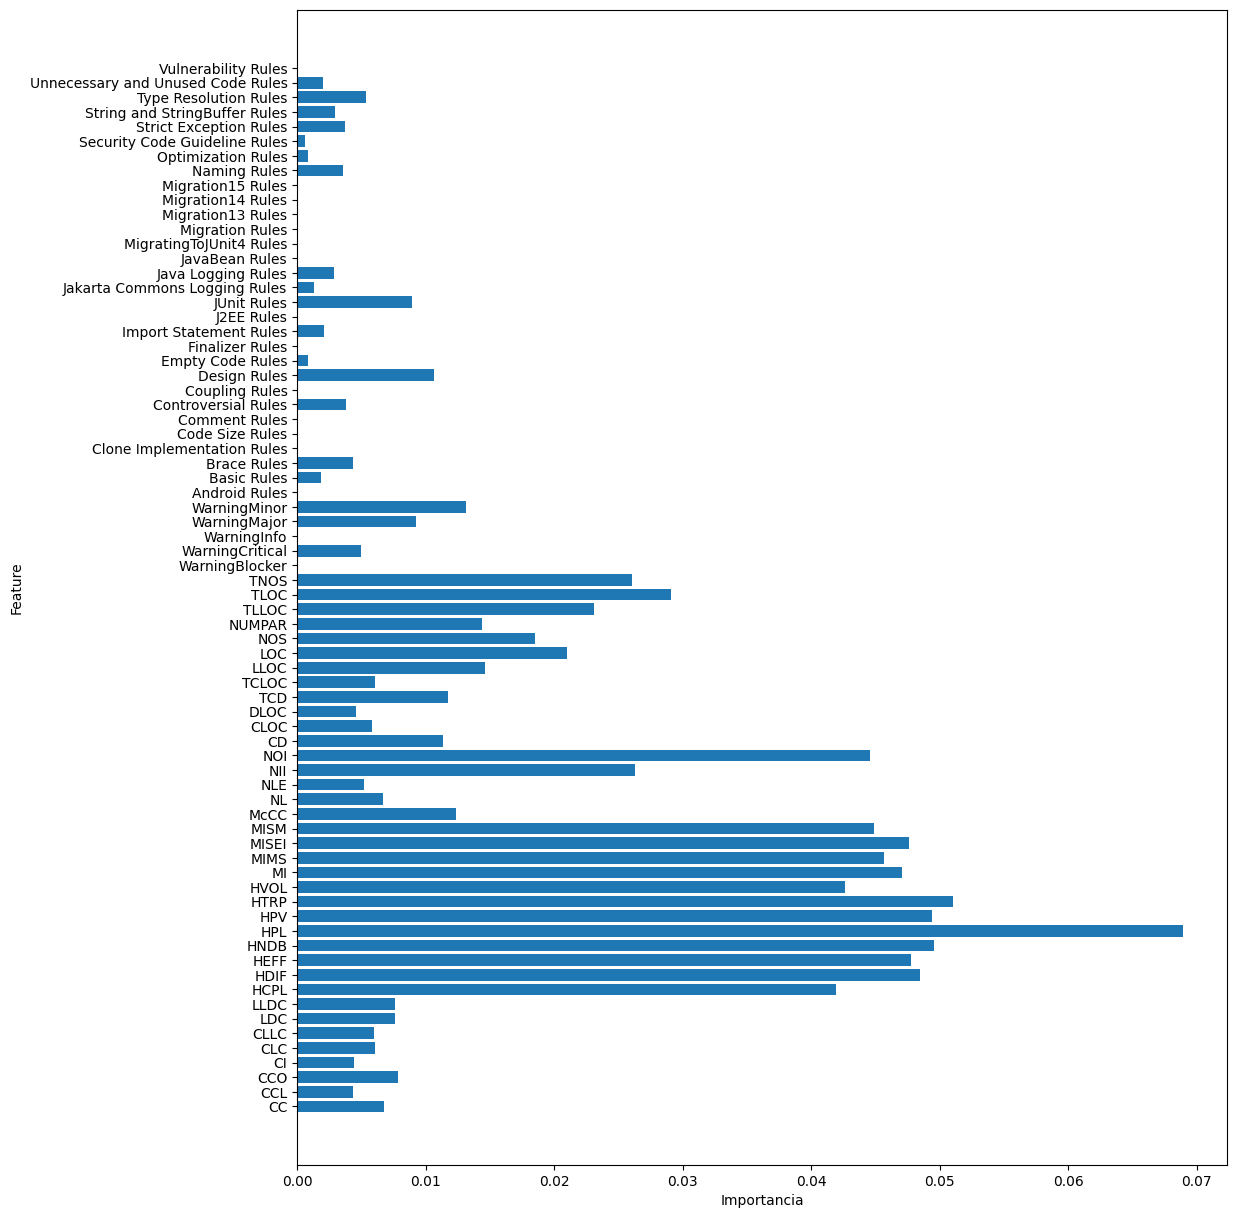

In [79]:
# Importancia de las features sobre el modelo random forest
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
fig, ax = plt.subplots(figsize=(12,15))
ax.barh(range(len(rf.feature_importances_)), rf.feature_importances_)
ax.set_yticks(range(len(X_train.columns)))
ax.set_yticklabels(X_train.columns)
ax.set_xlabel("Importancia")
ax.set_ylabel("Feature")
plt.show()

In [80]:
entry_to_explain = X_test.iloc[10]
type(entry_to_explain)
entry_to_explain

CC                                   0
CCL                                  0
CCO                                  0
CI                                   0
CLC                                  0
                                    ..
Strict Exception Rules               0
String and StringBuffer Rules        0
Type Resolution Rules                0
Unnecessary and Unused Code Rules    0
Vulnerability Rules                  0
Name: 17993, Length: 72, dtype: int64

# Shap

In [24]:
import shap
import joblib
shap_explainer = shap.TreeExplainer(rf)
shap.initjs()

c:\Users\david\Desktop\bug-prediction-explanation\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


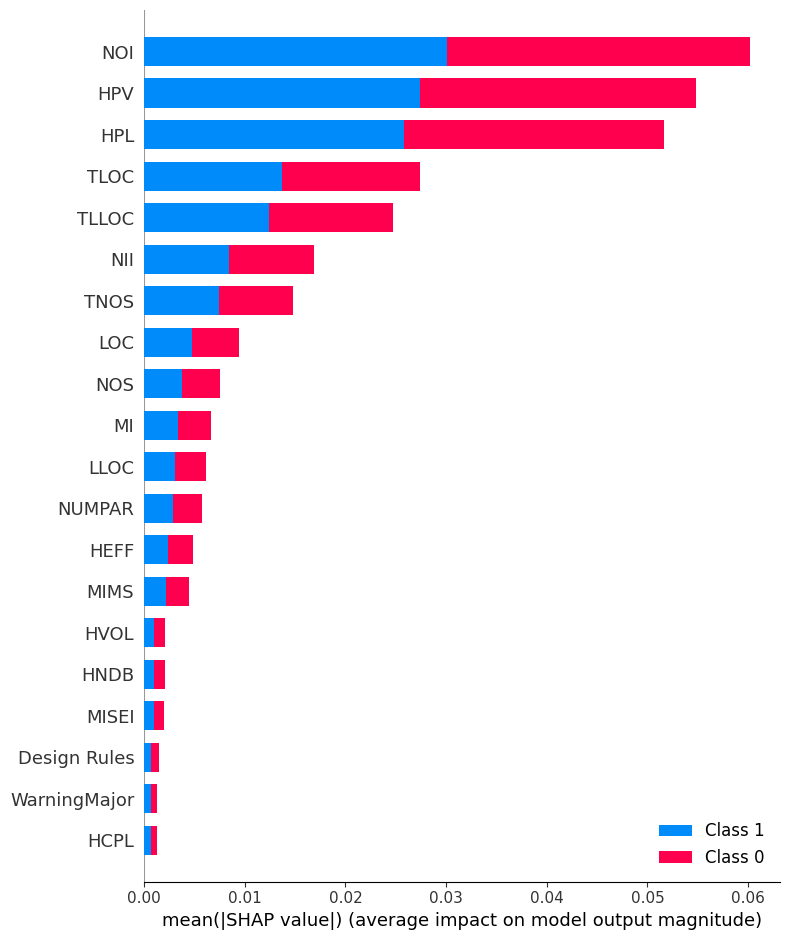

In [37]:
# Plot de resumen global 
shap.summary_plot(shap_explainer.shap_values(X_test.iloc[:1,:]), X_test, plot_type="bar")

In [25]:
shap_values = shap_explainer.shap_values(np.array(entry_to_explain))
forcePlot = shap.force_plot(shap_explainer.expected_value[1], shap_values[1], entry_to_explain)
forcePlot

In [49]:
s_values = shap_explainer(X_test)
s_values
# waterfall = shap.plots.waterfall(shap_values)

.values =
array([[[ 4.83974767e-05, -4.83974767e-05],
        [ 4.33833814e-04, -4.33833814e-04],
        [ 5.41950962e-04, -5.41950962e-04],
        ...,
        [ 1.82327418e-04, -1.82327418e-04],
        [ 4.81559288e-06, -4.81559288e-06],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[-4.74668080e-05,  4.74668080e-05],
        [-4.62107731e-03,  4.62107731e-03],
        [-3.84345416e-03,  3.84345416e-03],
        ...,
        [-1.57351274e-03,  1.57351274e-03],
        [ 4.78203260e-05, -4.78203260e-05],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 9.68354570e-05, -9.68354570e-05],
        [ 7.86612237e-04, -7.86612237e-04],
        [ 6.74106016e-04, -6.74106016e-04],
        ...,
        [ 1.68568586e-04, -1.68568586e-04],
        [ 4.37100814e-06, -4.37100814e-06],
        [ 0.00000000e+00,  0.00000000e+00]],

       ...,

       [[ 4.43743035e-05, -4.43743035e-05],
        [ 1.70272340e-04, -1.70272340e-04],
        [ 2.27853185e-04, -2.27853185e-04],
        

In [26]:
def shap_force_plot(X_test:pd.DataFrame, explainer:shap.TreeExplainer, x:int): 
    for i in range(x): 
        shap_values = explainer.shap_values(np.array(entry_to_explain))
        shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[i], matplotlib=True, show=False)
        string = f"./img/shap/{i}.png"
        plt.savefig(f"./img/shap/{i}.png", dpi=150, bbox_inches='tight')

# shap_force_plot(X_test=X_test, explainer=explainer, x=100)

# Lime

In [27]:
import lime
import lime.lime_tabular
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, 
                            feature_names=X_test, discretize_continuous=True)
# exp = explainer.explain_instance(entry_to_explain, rf.predict_proba,num_features=len(X_train.columns), top_labels=1)
exp = lime_explainer.explain_instance(entry_to_explain, rf.predict_proba,num_features=10, top_labels=1)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [28]:
exp.show_in_notebook(show_table=True, show_all=False)

In [29]:
def lime_explain(X_test:pd.DataFrame, explainer:lime.lime_tabular.LimeTabularExplainer, rf:RandomForestClassifier , x:int): 
    for i in range(x): 
        exp = explainer.explain_instance(X_test.iloc[i], rf.predict_proba, num_features=10, top_labels=1)
        exp.save_to_file(f"./img/lime/{i}.html")

# lime_explain(X_test=X_test, explainer=lime_explainer,rf = rf, x=100)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

KeyboardInterrupt: 

In [30]:
probabilities = rf.predict_proba(X_test)
print(f"Probabilities: \n5: {probabilities[5]}\n23: {probabilities[23]}\n30: {probabilities[30]}\n47: {probabilities[47]}\n70: {probabilities[70]}\n95: {probabilities[95]}")

Probabilities: 
5: [0.84801542 0.15198458]
23: [0.75714867 0.24285133]
30: [0.96340742 0.03659258]
47: [0.57602563 0.42397437]
70: [0.49713833 0.50286167]
95: [0.56362203 0.43637797]


## Tree schemas

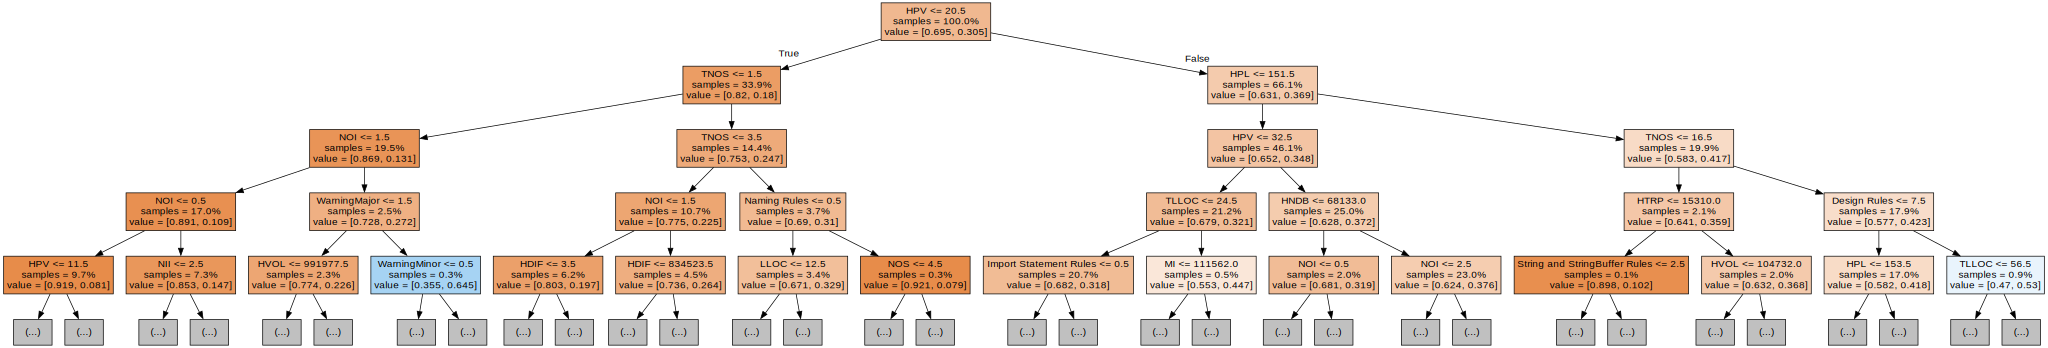

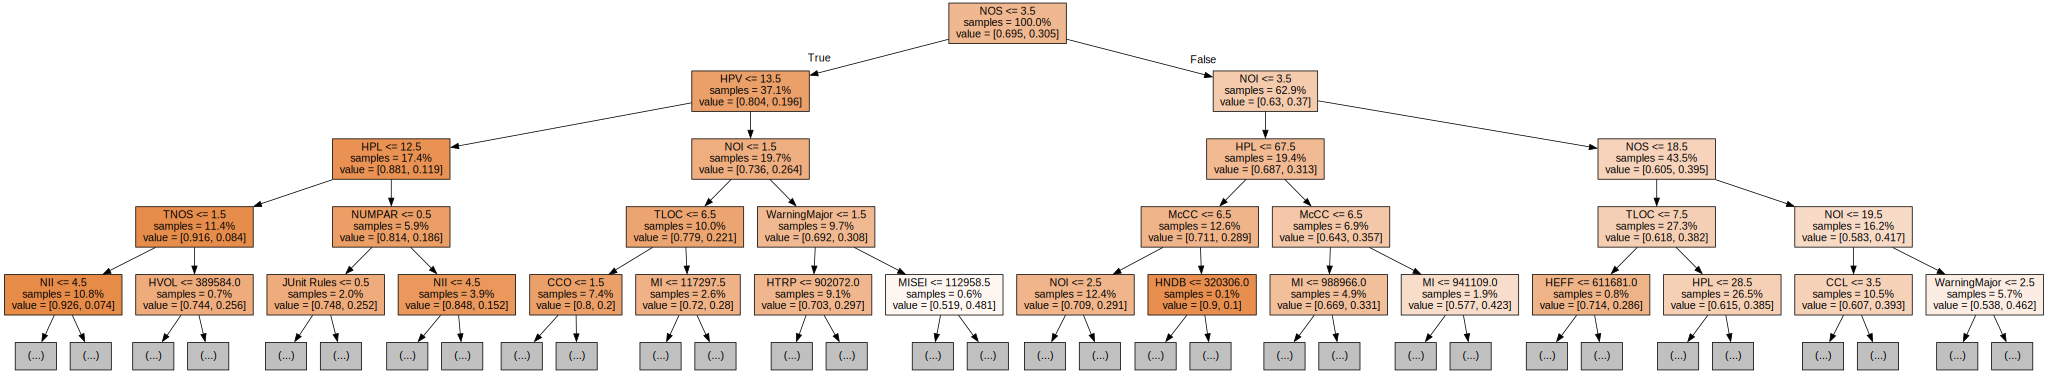

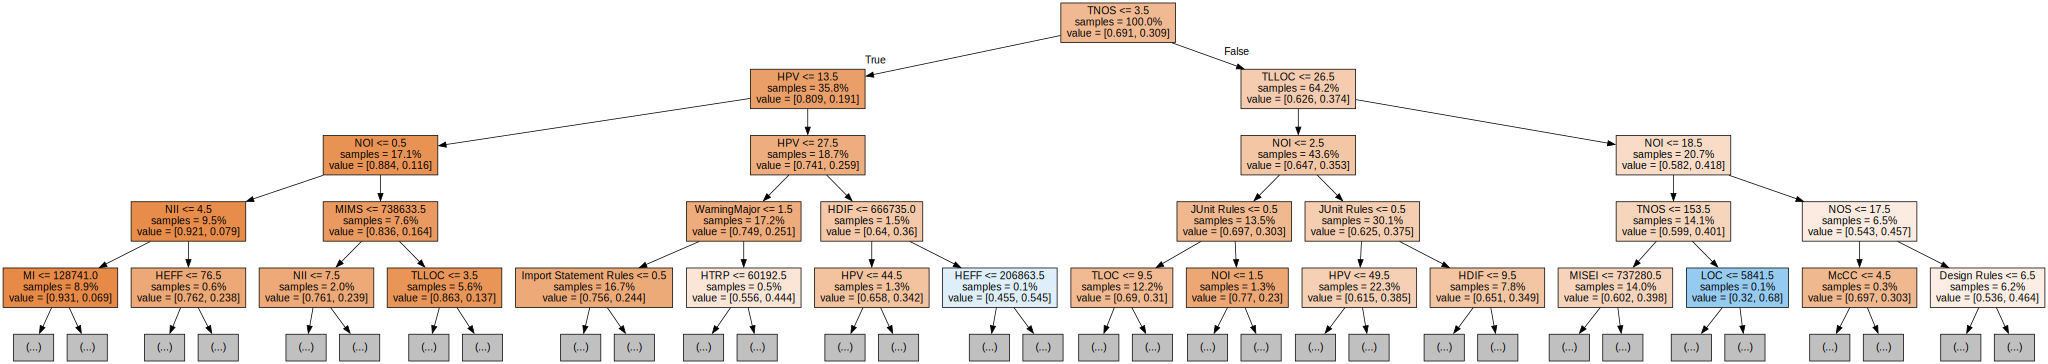

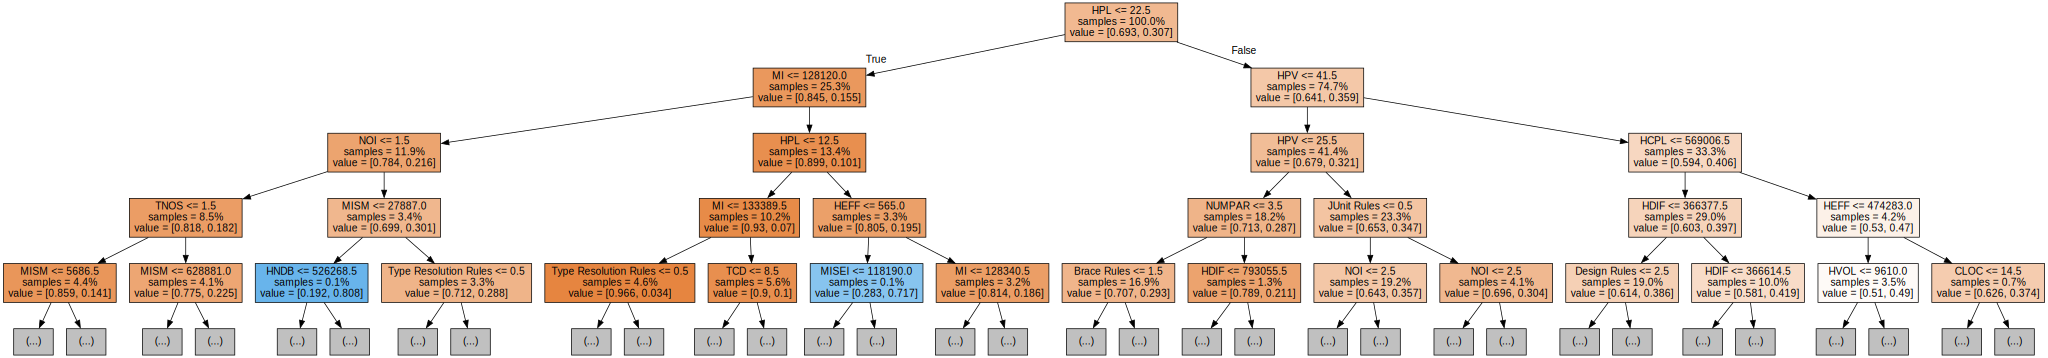

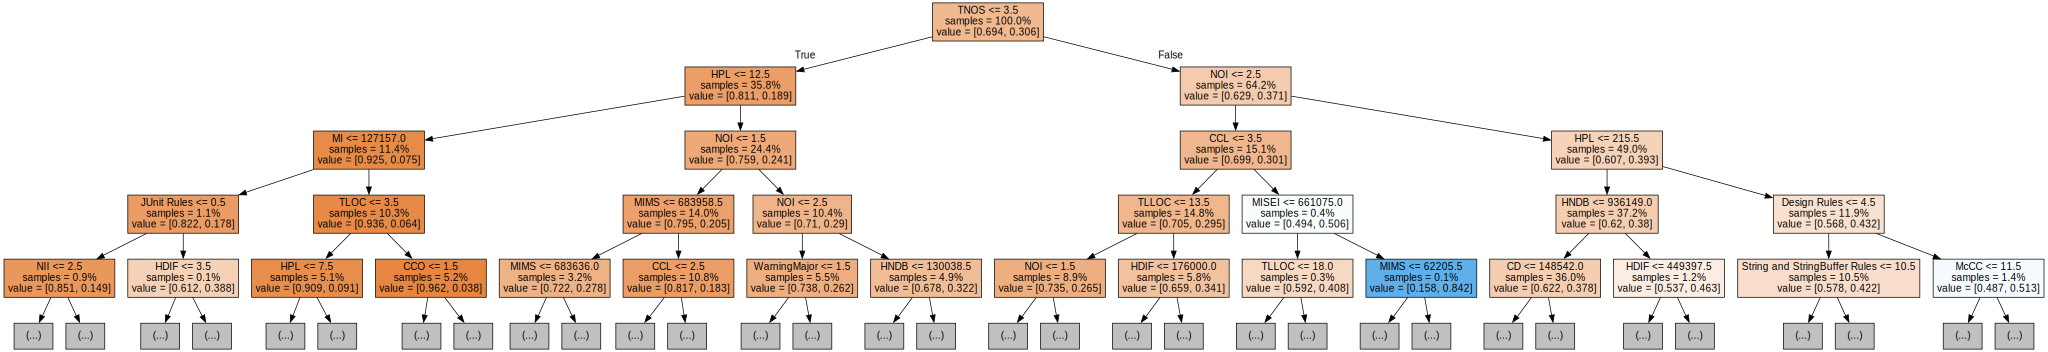

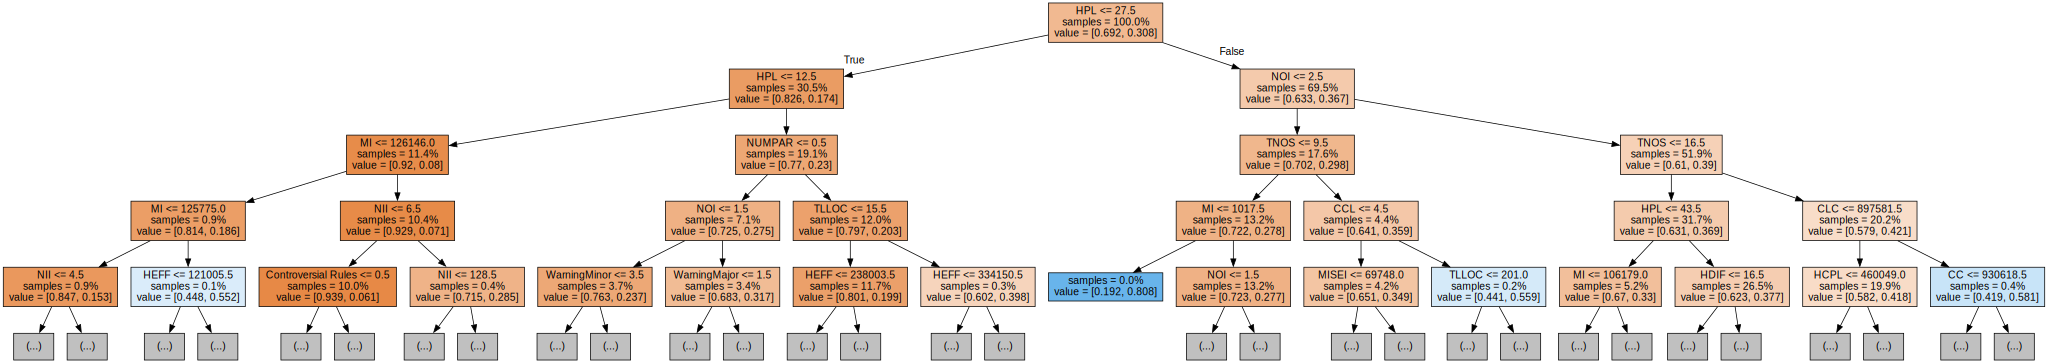

In [35]:
# Ejectura esta parte si está instalado graphviz en el equipo
# from sklearn.tree import export_graphviz
# import graphviz
# for i in [5, 23, 30, 47, 70, 95]:
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=4, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     graph.render(filename=f'g1.dot')
#     display(graph)

# XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2022)

search_space = {
    "n_estimators": [100,300],
    "max_depth": [3,7],
    "min_samples_split": [25, 50],
    "max_features": [2,4]
}

GS = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv = 5,
                 verbose = 4)

GS.fit(X_train, y_train)

print(GS.best_params_)

In [31]:
# Definición del modelo XGBoost
model = xgb.XGBClassifier()

# Entrenamos el modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
# Comprobamos la precisión en las predicciones del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión: {:.2f}%'.format(accuracy * 100))


Precisión: 70.08%


# XGBoost with GPU usage

In [57]:
# Definimos el modelo para actuar con el procesado pro GPU
xgb_gpu = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

# Entrenamos el modelo
xgb_gpu.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
y_pred = xgb_gpu.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 70.16%
